<a href="https://colab.research.google.com/github/Ashong-Nartey/Ashong-Nartey/blob/main/Emotion_Recognition_HF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages

In [1]:
!pip install nlp
!pip install datasets
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install pandas evaluate --quiet
!pip install comet_ml -q


import tensorflow as tf
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nlp
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from keras.layers import Dense, Dropout
# from keras.layers import LSTM
# from keras.models import Sequential
# from keras.layers import Embedding
# from keras.layers import Flatten
# from keras.layers import Bidirectional
# from keras.callbacks import EarlyStopping
# from keras.layers import GlobalAvgPool1D
import random
import datasets

import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 117.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 8.1 

In [2]:
for dirname, _, filenames in os.walk('/content/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Import the Hugging Face Dataset

In [3]:
# Importing the dataset
data = datasets.load_dataset('emotion')

# Converting the train, validation and test datasets into DataFrame format
data_train = pd.DataFrame(data['train'])
data_validation = pd.DataFrame(data['validation'])
data_test = pd.DataFrame(data['test'])

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [4]:
# Train dataset.   ##
### ['0 = sadness', '1 = joy', '2 = love', '3 = anger', '4 = fear', '5 = surprise']
classes = data['train'].features['label'].names
classes
data_train.head(10)

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
5,ive been feeling a little burdened lately wasn...,0
6,ive been taking or milligrams or times recomme...,5
7,i feel as confused about life as a teenager or...,4
8,i have been with petronas for years i feel tha...,1
9,i feel romantic too,2


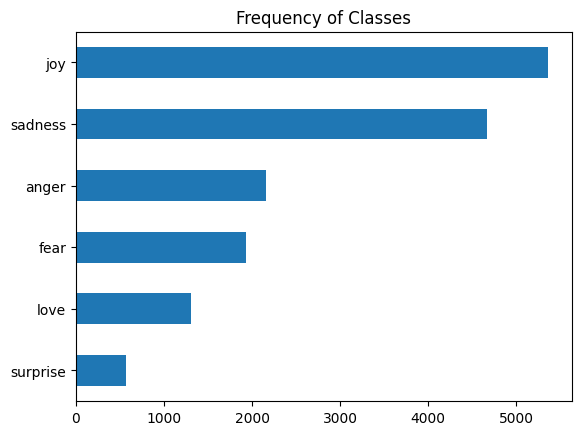

In [5]:
df = data['train'][:]
data_train['label_name'] = data_train['label'].apply(lambda x: classes[x])
data_train.head()

label_counts = data_train['label_name'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title('Frequency of Classes')
plt.show()

In [6]:
# Let's check the unique labels of the dataset

### num_labels = len(classes)

data_train['label'].unique()

array([0, 3, 2, 5, 4, 1])

# Distribution of the Length of the Texts

In [7]:
data_train['length_of_text'] = [len(i.split(' ')) for i in data_train['text']]

fig = px.histogram(data_train['length_of_text'], marginal='box',
                   labels={"value": "Length of the Text"})

fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Length of the Texts',
                  title_x=0.5, title_font=dict(size=22))
fig.show()

 #### The length of the data points is distributed between 4 to 46. The outliers start from 48 words.

## Distribution of the Length of the Texts by Emotions

In [8]:
fig = px.histogram(data_train['length_of_text'], marginal='box',
                   labels={"value": "Length of the Text"},
                   color=data_train['label'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Length of the Texts by Emotions',
                  title_x=0.5, title_font=dict(size=22))
fig.show()

In [9]:
fig = px.histogram(data_train, x='label', color='label')
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Labels',
                  title_x=0.5, title_font=dict(size=22))
fig.show()

## Data Preprocessing

In [10]:
classes

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [11]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [12]:
def tokenize(batch):
  temp =tokenizer(batch['text'], padding=True, truncation=True)
  return temp

print(tokenize(data["train"][:5]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102], [101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2572, 2412, 3110, 16839, 9080, 12863, 2055, 1996, 13788, 1045, 2097, 2113, 2008, 2009, 2003, 2145, 2006, 1996, 3200, 102, 0], [101, 1045, 2572, 3110, 24665, 7140, 11714, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [13]:
def data_preprocessing(dataset):
    # Define the labels mapping
    label_mapping = {
        "sadness": 0,
        "joy": 1,
        "love": 2,
        "anger": 3,
        "fear": 4,
        "surprise": 5
    }

    # Creating a new column called 'label' with the mapped values
    dataset['label'] = [label_mapping[x.lower()] for x in dataset[1]]

    # Dropping unwanted columns
    dataset = dataset.drop(labels=[0, 1, 8, 9, 10, 11, 12], axis=1)

    # Dealing with empty datapoints for metadata columns
    meta_columns = [3, 4, 5, 6, 7, 13]
    for col in meta_columns:
        dataset[col] = dataset[col].replace(0, 'None')

    # Combining all the meta data columns into a single column
    dataset['meta_combined'] = dataset[meta_columns].astype(str).agg(' '.join, axis=1)

    # Adding cleaned and combined metadata column to the dataset
    dataset["sentence"] = dataset['meta_combined'] + " " + dataset[2]

    # Dropping metadata columns, as we have merged them into a single column
    dataset = dataset.drop(meta_columns + ['meta_combined', 2], axis=1)

    # Dropping rows with null values
    dataset = dataset.dropna()

    return dataset


## Building of a Model

In [14]:
from datasets.tasks.automatic_speech_recognition import AutomaticSpeechRecognition
import torch
from transformers import BertForSequenceClassification, BertTokenizer, RobertaForSequenceClassification, RobertaTokenizer, AdamW
# model = AutoModel.from_pretrained(model_ckpt)

## Load BERT base Model, Bert Tokenizer, RoBERTa base Model and RoBERTa tokenizer

In [15]:
### loading the BERT
bert_model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                           num_labels = 6, ### we use 6 in case we forget or unable to get the num_classes
                                                           output_attentions = False,#### model isn't ouputting any model parameter
                                                           output_hidden_states = False
                                                           )

### loading the BERT Tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case=True)
bert_model.cuda()


### loading the RoBERTa
roberta_model = RobertaForSequenceClassification.from_pretrained("roberta-base",
                                                           num_labels = 6, ### we use 6 in case we forget or unable to get the num_classes
                                                           output_attentions = False,#### model isn't ouputting any model parameter
                                                           output_hidden_states = False
                                                           )

### loading the BERT Tokenizer
roberta_tokenizer = RobertaTokenizer.from_pretrained("roberta-base", do_lower_case=True)
roberta_model.cuda()
print("Base Models Loaded")


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Base Models Loaded


### Print the original sentence as a check to the preprocessed sentences that would be modeled

In [16]:
print('original:', data_train['text'][0])

##split the to sentence into tokens - BERT
print('Tokenized Bert:', bert_tokenizer.tokenize(data_train['text'][0]))

### Map the the tokens to IDS - Bert
print('Token IDS Bert', bert_tokenizer.convert_tokens_to_ids(bert_tokenizer.tokenize(data_train['text'][0])))


### Do same for RoBERTa

original: i didnt feel humiliated
Tokenized Bert: ['i', 'didn', '##t', 'feel', 'humiliated']
Token IDS Bert [1045, 2134, 2102, 2514, 26608]


## Assign Sentences and Labels with separate variables

In [17]:
#assigning sentences and labels to separate variables
sentences = data_train["text"].values
labels = data_train["label"].values
print(sentences)
print(labels)

['i didnt feel humiliated'
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'
 'im grabbing a minute to post i feel greedy wrong' ...
 'i feel strong and good overall'
 'i feel like this was such a rude comment and im glad that t'
 'i know a lot but i feel so stupid because i can not portray it']
[0 0 3 ... 1 3 0]


## Tokenization

In [18]:
def bert_roberta_tokenization(dataset):
  sentences = dataset['text'].values
  labels = dataset['label'].values
  max_length = 256

  ### tokenize all the sentences and map the tokens to their word IDS
  bert_input_IDS = []
  bert_attention_masks = []
  #### do same for the RoBerta
  roberta_input_IDS = []
  roberta_attention_masks = []


  sentence_ids = []
  counter = 0

  ### for every sentence....
  for sent in sentences:
    #### encode_plus funtion to encode the sentences as required by the model together tokenization
    bert_encode_dict = bert_tokenizer.encode_plus(
        str(sent), # sentence
        add_special_tokens = True,  ### Add some tokens like [CLS], [SEP] and [UNK]
        max_length = 256, ## Since we have seen from our analysis majority of the sentences to be less that 256 in length
        pad_to_max_length = True, # pad sentences to 256 length if the length is the less.
        return_attention_mask = True, ## create attention mask
        return_tensors = 'pt', ## return pytorch tensors
    )

    #### Roberta
    roberta_encode_dict = roberta_tokenizer.encode_plus(
        str(sent), # sentence
        add_special_tokens = True,  ### Add some tokens like [CLS], [SEP] and [UNK]
        max_length = 256, ## Since we have seen from our analysis majority of the sentences to be less that 256 in length
        pad_to_max_length = True, # pad sentences to 256 length if the length is the less.
        return_attention_mask = True, ## create attention mask
        return_tensors = 'pt', ## return pytorch tensors
    )

    ## add encoded sentence to the empty list
    bert_input_IDS.append(bert_encode_dict['input_ids']) ### bert
    roberta_input_IDS.append(bert_encode_dict['input_ids']) ### roberta

    ## add the attention masks to the list
    bert_attention_masks.append(bert_encode_dict['attention_mask']) ### bert
    roberta_attention_masks.append(bert_encode_dict['attention_mask']) ### roberta

    ## collect the sentence IDS
    sentence_ids.append(counter)
    counter = counter + 1

  ## convert the lists into tensors

  ##bert
  bert_input_IDS = torch.cat(bert_input_IDS, dim = 0)
  bert_attention_masks = torch.cat(bert_attention_masks, dim = 0)
  ### Roberta
  roberta_input_IDS = torch.cat(roberta_input_IDS, dim = 0)
  roberta_attention_masks = torch.cat(roberta_attention_masks, dim = 0)


  labels = torch.tensor(labels)
  sentence_ids = torch.tensor(sentence_ids)

  ## return the tensors
  return {"Bert":[bert_input_IDS, bert_attention_masks, labels], "RoBerta":[roberta_input_IDS, roberta_attention_masks, labels]}

In [19]:
from torch.utils.data import TensorDataset, random_split
torch.manual_seed(0)

# tokenize the trainset
token_dict_train = bert_roberta_tokenization(data_train)
print(token_dict_train.keys())

bert_input_IDS, bert_attention_masks, labels = token_dict_train["Bert"] ## bert
roberta_input_IDS, roberta_attention_masks, labels = token_dict_train["RoBerta"] #RoBERTa

# tokenize the validation set
token_dict_valid = bert_roberta_tokenization(data_validation)

bert_input_IDS_valid, bert_attention_masks_valid, labels_valid = token_dict_valid["Bert"] ### Bert
roberta_input_IDS_valid, roberta_attention_masks_valid, labels_valid = token_dict_valid["RoBerta"]#RoBERTa

# tokenize the test set
token_dict_test = bert_roberta_tokenization(data_test)

bert_input_IDS_test, bert_attention_masks_test, labels_test = token_dict_test["Bert"] ## bert
roberta_input_IDS_test, roberta_attention_masks_test, labels_test = token_dict_test["RoBerta"]#RoBERTa


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True

dict_keys(['Bert', 'RoBerta'])


In [20]:
## Combine the training input into a TensorDataset

bert_train_dataset = TensorDataset(bert_input_IDS, bert_attention_masks, labels)
###Roberta

# Combine the validation input to tensorDataset
bert_validation_dataset = TensorDataset(bert_input_IDS_valid, bert_attention_masks_valid, labels_valid)
##Roberta

# Combine the test input to tensorDataset
bert_test_dataset = TensorDataset(bert_input_IDS_test, bert_attention_masks_test, labels_test)
##Roberta

In [21]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 32

### create the DataLoader for our training
bert_train_Loader = DataLoader(
    bert_train_dataset,   ## training samples
    sampler = RandomSampler(bert_train_dataset), ## select batches of data randomly
    batch_size = batch_size ### train the model with the Batch size of 32
)
##ROberta

In [22]:
### create the DataLoader for our validation
bert_valid_Loader = DataLoader(
    bert_validation_dataset,   ## training samples
    sampler = RandomSampler(bert_validation_dataset), ## select batches of data randomly
    batch_size = batch_size ### train the model with the Batch size of 32
)
##ROberta

In [23]:
# opt - AdamW

bert_opt = AdamW(bert_model.parameters(),
                 lr = 5e-6,
                 eps = 1e-8)
###Roberta

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning



In [24]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs
epochs = 2

# Total number of training steps is [number of batches] x [number of epochs]
total_steps = len(bert_train_Loader) * epochs

# Create the learning rate scheduler.
bert_scheduler = get_linear_schedule_with_warmup(bert_opt,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [25]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [26]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


import torch

# tell pytorch to use the gpu if available
if torch.cuda.is_available():

    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [27]:
import random
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128
# Set the seed value all over the place to make this reproducible.
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
loss_values = []
for epoch_i in range(0, epochs):
    #Training
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    # Measure how long the training epoch takes.
    t0 = time.time()
    # Reset the total loss for this epoch.
    total_loss = 0
    bert_model.train()
    # For each batch of training data...
    for step, batch in enumerate(bert_train_Loader):
      #Report progress after every 40 epochs
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # print current training batch and elapsed time
            print('Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(bert_train_Loader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        bert_model.zero_grad()

        outputs = bert_model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)

        # model returns a tuple, extract loss value from that tuple
        loss = outputs[0]
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(bert_model.parameters(), 1.0)
        bert_opt.step()

        bert_scheduler.step()
    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(bert_train_Loader)

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)
    print("")
    print("Average training loss: {0:.2f}".format(avg_train_loss))
    print("Training epcoh took: {:}".format(format_time(time.time() - t0)))

    #Validation Part


    print("")
    print("Running Validation...")
    t0 = time.time()
    # Put the model in evaluation mode
    bert_model.eval()
    # Tracking variables
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    # Evaluate data for one epoch
    for batch in bert_valid_Loader:

        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)

        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
           outputs = bert_model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        logits = outputs[0]
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)

        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy
        # Track the number of batches
        nb_eval_steps += 1
    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))
print("")
print("Training complete!")


======== Epoch 1 / 2 ========
Training...
Batch    40  of    500.    Elapsed: 0:00:48.
Batch    80  of    500.    Elapsed: 0:01:37.
Batch   120  of    500.    Elapsed: 0:02:28.
Batch   160  of    500.    Elapsed: 0:03:18.
Batch   200  of    500.    Elapsed: 0:04:08.
Batch   240  of    500.    Elapsed: 0:04:58.
Batch   280  of    500.    Elapsed: 0:05:49.
Batch   320  of    500.    Elapsed: 0:06:39.
Batch   360  of    500.    Elapsed: 0:07:29.
Batch   400  of    500.    Elapsed: 0:08:19.
Batch   440  of    500.    Elapsed: 0:09:09.
Batch   480  of    500.    Elapsed: 0:10:00.

Average training loss: 1.19
Training epcoh took: 0:10:25

Running Validation...
  Accuracy: 0.74
  Validation took: 0:00:29

======== Epoch 2 / 2 ========
Training...
Batch    40  of    500.    Elapsed: 0:00:50.
Batch    80  of    500.    Elapsed: 0:01:40.
Batch   120  of    500.    Elapsed: 0:02:31.
Batch   160  of    500.    Elapsed: 0:03:21.
Batch   200  of    500.    Elapsed: 0:04:11.
Batch   240  of    500. 

## Plotting the training loss over epochs
import plotly.express as px

In [28]:
import plotly.express as px
f = pd.DataFrame(loss_values)
f.columns = ["Loss"]
fig = px.line(f, x = f.index, y = f.Loss)
fig.update_layout(title = "Training Loss of the Model",
                  xaxis_title = "Epoch",
                  yaxis_title = "Loss")
fig.show()

## Testing Phase

In [29]:
### create a test data loader using the SequentialSampler
bert_prediction_sampler = SequentialSampler(bert_test_dataset)
bert_prediction_dataloader = DataLoader(bert_test_dataset, sampler = bert_prediction_sampler, batch_size=batch_size)

In [30]:
### Predict on the test set
print("#############################################################")
# print(f"Predicting labels for {:,} test sentences".format(len(bert_input_IDS_test)))

## put the model in evaluation mode
bert_model.eval()

### track the variables
predictions, true_labels = [], []

#############################################################


In [31]:
### predict
for batch in bert_prediction_dataloader:
  ### add to the GPU
  batch = tuple(t.to(device) for t in batch)

  ### unpack the input from the dataloader
  bt_input_ids, bt_input_mask, bt_labels = batch

  with torch.no_grad():
    ### forward pass
    outputs = bert_model(bt_input_ids, token_type_ids = None,
                         attention_mask = bt_input_mask)

logits  = outputs[0]


### move the logits and the labels to CPU
logits = logits.detach().cpu().numpy()
label_ids = bt_labels.to('cpu').numpy()


### store the predictions and the true labels
predictions.append(logits)
true_labels.append(label_ids)

print('DONE!')


DONE!


In [32]:
### classification report as well as the confusion matrix for the test set

prediction_labels = [item for subitem in predictions for item in subitem]

prediction_labels = np.argmax(prediction_labels, axis=1).flatten()

### combine the correct labels for each batch in the list

flat_true_labels = [item for sublist in true_labels for item in sublist]

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(prediction_labels, flat_true_labels))
print(confusion_matrix(flat_true_labels, prediction_labels))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       0.60      1.00      0.75         3
           4       1.00      0.67      0.80         3

    accuracy                           0.88        16
   macro avg       0.92      0.89      0.89        16
weighted avg       0.93      0.88      0.88        16

[[4 0 0 0 0]
 [0 3 0 0 0]
 [0 0 2 0 0]
 [1 0 0 3 1]
 [0 0 0 0 2]]
